In [310]:
!pip install -r requirements.txt

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [312]:
train_path = "train.csv"
train = pd.read_csv(train_path)

test_path = "test.csv"
test = pd.read_csv(test_path)

In [313]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (167, 14)
test shape:  (72, 14)


In [314]:
train.head()

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,170,0,45.0,0,615,1,55,0,222000.00,0.8,141,0,0,257
1,81,0,60.0,1,737,0,60,1,210000.00,1.5,135,1,1,95
2,22,0,51.0,1,582,1,35,0,263358.03,1.5,136,1,1,145
3,194,1,57.0,1,129,0,30,0,395000.00,1.0,140,0,0,42
4,20,1,59.0,1,176,1,25,0,221000.00,1.0,136,1,1,150


In [315]:
train.describe()

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,121.892216,0.335329,60.894216,0.431138,559.868263,0.443114,38.017964,0.341317,260856.361796,1.399461,136.467066,0.652695,0.305389,128.532934
std,69.191025,0.473525,12.432311,0.496725,907.146835,0.498247,11.590125,0.475578,94646.946970,1.044597,4.308558,0.477546,0.461957,79.092655
min,0.000000,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.600000,113.000000,0.000000,0.000000,4.000000
25%,60.500000,0.000000,50.500000,0.000000,115.000000,0.000000,30.000000,0.000000,212000.000000,0.900000,134.000000,0.000000,0.000000,65.500000
50%,124.000000,0.000000,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,263000.000000,1.100000,137.000000,1.000000,0.000000,115.000000
75%,182.500000,1.000000,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,305000.000000,1.400000,139.000000,1.000000,1.000000,207.000000
max,238.000000,1.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,280.000000


In [316]:
soloMorti = train.loc[train['DEATH_EVENT']==1]
soloVivi = train.loc[train['DEATH_EVENT']==0]

Ho descritto soltanto l'analisi di 4 features essendo quelle più rilevanti.
Come per queste ho eseguito gli stessi passi anche per le altre, accorgendomi che il rapporto tra i vari casi di attacchi cardiaci e quindi morte rispetto a tutte le altre features risultava essere circa costante ad 1/3, innalzando così la complessità del modello senza avere però dei risultati veri e propri.

# age
funzione che permette di dividere l'età in gruppi sicuramente un parametro importante in quanto maggiore è l'eta maggiore sarà il rischio di infarto

In [317]:
def fascia_eta(dataSet):
    bins= [0,51,61,71,100]
    labels = [0,1,2,3]
    
    dataSet['age'] = pd.cut(dataSet['age'], bins=bins, labels=labels, right=False)

fascia_eta(train)
fascia_eta(test)

In [318]:
train.groupby(['DEATH_EVENT', 'age'])['DEATH_EVENT'].count()

DEATH_EVENT  age
0            0      34
             1      34
             2      35
             3       8
1            0       8
             1      15
             2      12
             3      21
Name: DEATH_EVENT, dtype: int64

# time
vi è una relazione tra le persone prese in osservazione e gli attacchi cardiaci. In particolare le persone che sono state prese in esame da meno tempo hanno una possibilità maggiore di morire

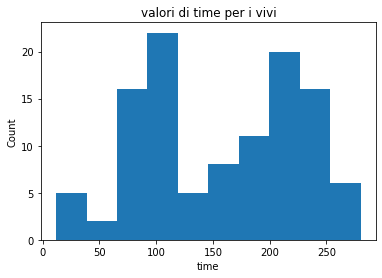

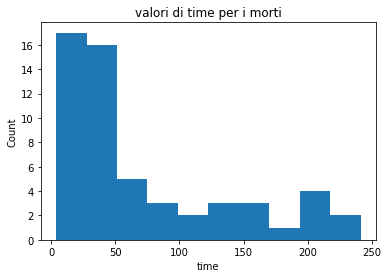

In [319]:
plt.hist(soloVivi['time'])
plt.xlabel('time')
plt.ylabel('Count')
plt.title('valori di time per i vivi')
plt.show()

plt.hist(soloMorti['time'])
plt.xlabel('time')
plt.ylabel('Count')
plt.title('valori di time per i morti')
plt.show()

In [320]:
train['time'] = pd.cut(train.time, bins=4, labels=np.arange(4), right=False)
test['time'] = pd.cut(test.time, bins=4, labels=np.arange(4), right=False)

In [321]:
train.groupby(['DEATH_EVENT', 'time'])['DEATH_EVENT'].count()

DEATH_EVENT  time
0            0        9
             1       39
             2       31
             3       32
1            0       37
             1        9
             2        7
             3        3
Name: DEATH_EVENT, dtype: int64

# serum_creatinine
Ad essere sincero non riesco bene a stimare la relazione che vi è tra creatinina e morte ma facendo un paragone tra i valori creatinina nelle persone vive con quelli dei morti si riesce ad osservare che all'aumentare della creatinina aumenta anche il rischio di morte

In [322]:
train['serum_creatinine'].describe()

count    167.000000
mean       1.399461
std        1.044597
min        0.600000
25%        0.900000
50%        1.100000
75%        1.400000
max        9.000000
Name: serum_creatinine, dtype: float64

In [323]:
# funzione che permette di dividere i valori della creatinina in gruppi
def group_serum_creatinine(dataSet):
    bins= [0,0.5,1,1.5,10]
    labels = [0,1,2,3]
    
    dataSet['serum_creatinine'] = pd.cut(dataSet['serum_creatinine'], bins=bins, labels=labels, right=False)
    
group_serum_creatinine(train)
group_serum_creatinine(test)

In [324]:
train.groupby(['DEATH_EVENT', 'serum_creatinine'])['DEATH_EVENT'].count()

DEATH_EVENT  serum_creatinine
0            0                    0
             1                   41
             2                   57
             3                   13
1            0                    0
             1                    4
             2                   26
             3                   26
Name: DEATH_EVENT, dtype: int64

# ejection_fraction
Le persone che hanno una minore perchentuale di sangue ch esce dal cuore ad ogni contrazione hanno una probabilità maggiore di avere un attacco cardiaco e quindi una maggiore possibilità di morire

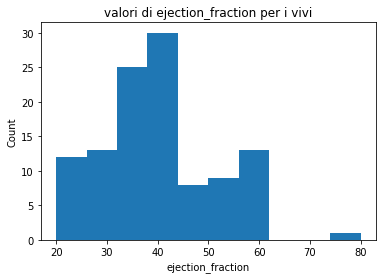

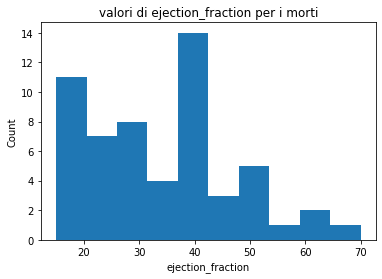

In [325]:
plt.hist(soloVivi['ejection_fraction'])
plt.xlabel('ejection_fraction')
plt.ylabel('Count')
plt.title('valori di ejection_fraction per i vivi')
plt.show()

plt.hist(soloMorti['ejection_fraction'])
plt.xlabel('ejection_fraction')
plt.ylabel('Count')
plt.title('valori di ejection_fraction per i morti')
plt.show()

In [326]:
train['ejection_fraction'] = pd.cut(train.ejection_fraction, bins=3, labels=np.arange(3), right=False)
test['ejection_fraction'] = pd.cut(test.ejection_fraction, bins=3, labels=np.arange(3), right=False)

In [327]:
train_X = train.drop('DEATH_EVENT', axis=1)
train_y = train['DEATH_EVENT']

test_X = test.drop('DEATH_EVENT', axis=1)
test_y = test['DEATH_EVENT']

# DecisionTreeClassifier

In [328]:
col = ['serum_creatinine', 'age', 'ejection_fraction', 'time']

Ho scelto di utilizzare solo 4 features essendo quelle che mi davano un rapporto maggiore tra morte e features o gruppo interno alla feature e con il quale avrei potuto ottenere prestazioni migliori.
Le altre features non sembravano influenzare positivamente il modello, anzi aggiungendo features diverse da quelle sopra elencate il test test diminuiva.

Ho cercato di concentrarmi soltanto sulla predizione dell'etichetta 1 (morte) anche se risulta ostico a causa di una concentrazione dei dati verso la laber 0 (vivi) e nella maggior parte delle volte ciò che andava a fare il mio modello era stimare gli 0. Nonostante alcuni modelli avessero training set / test set che sembravano risultare migliori in realtà la previsione della label 1 peggiorava.

Ho notato che inizializzando i dati nel notebook di preparazione più volte i risultati del classificatore cambiano notevolmente e si passa a volte da una predizione della label 1 di 80% 90% ad un 60 o 70% nonostante l'accuracy del test set non cambi. Penso che il problema sia dovuto alla scarsità dei dati a disposizione.

In [329]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=8, criterion='entropy')

# Fit Model
model.fit(train_X[col], train_y)

val_predictions = model.predict(test_X[col])

print("Accuracy on training set: {:.3f}".format(model.score(train_X[col], train_y)))
print("Accuracy on test set: {:.3f}".format(model.score(test_X[col], test_y)))

Accuracy on training set: 0.868
Accuracy on test set: 0.903


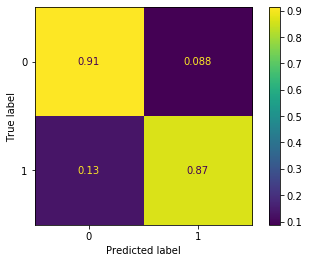

In [330]:
plot_confusion_matrix(model, test_X[col], test_y, normalize = 'true')  # doctest: +SKIP
plt.show()